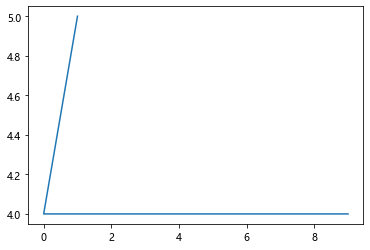

In [1]:
import matplotlib.pyplot as plt

# 第一个matplotlib程序
plt.figure()
plt.plot([1, 0, 9], [5, 4, 4]) # 第一个参数对应横坐标, 第二个参数对应纵坐标
plt.show() # 显示图像, 并且释放资源



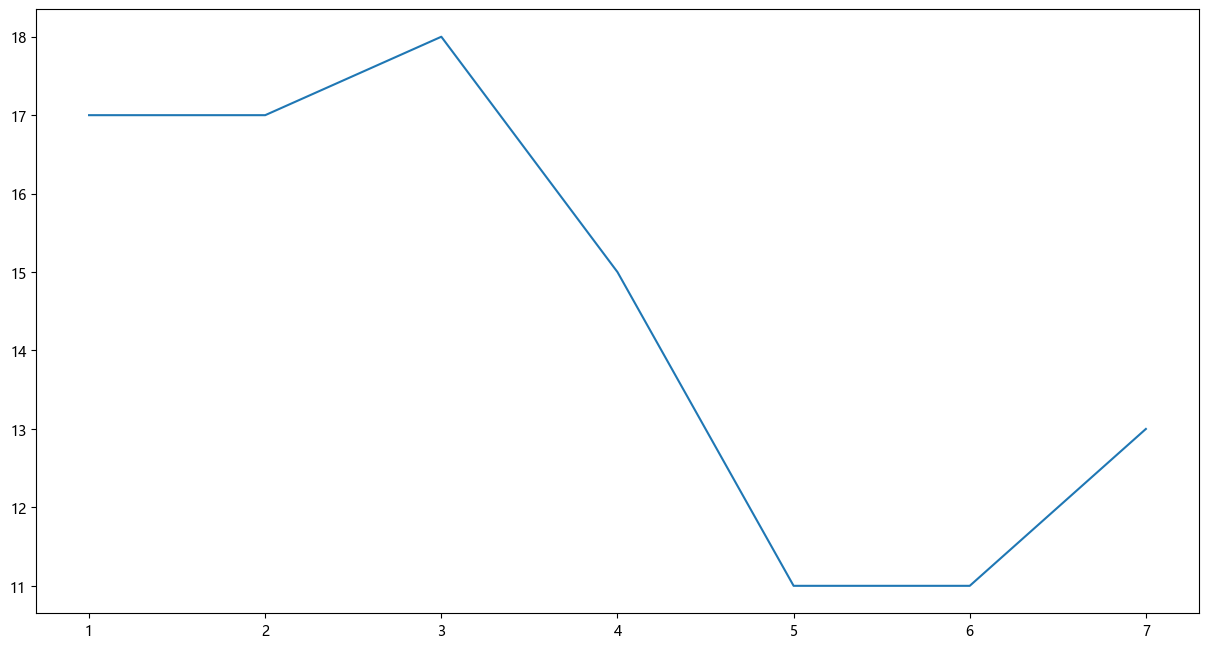

In [2]:
# 展现某一个城市的天气
# 1. 创建画布
plt.figure(figsize=(15, 8), dpi=100)

# 2. 在axes中绘制图像
plt.plot([1, 2, 3, 4, 5, 6, 7], [17, 17, 18, 15, 11, 11, 13])

# 保存图像, 必须在plt.show()之前
plt.savefig("test1.png")
#  plt.show()会释放figure资源, 如果在显示图像之后保存图片只会保存空图片

# 3. 显示图像
plt.show()

### 案例1: 完善图形 (从附属显示层

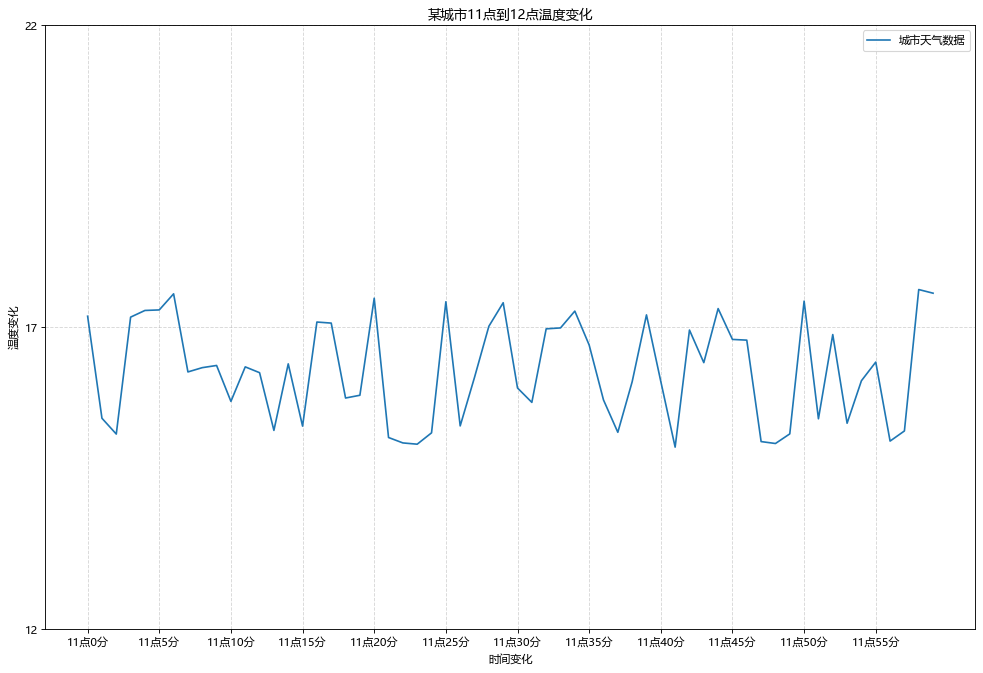

In [3]:
# 使用脚本式编程:
from matplotlib.pyplot import *
import random
import numpy as py

# 1. 准备数据: x, y
x = list(range(60))
# y = [random.uniform(15, 18) for i in x] # 使用列表生成式, 随机生成数据
# 或者使用numpy中的生成随机矩阵
y = np.random.uniform(15, 18, (1, 60)) # 但是这样生成的数据是ndarray类型
y = list(y[0]) # 所以我们还需要转换成list类型
# print(len(x), len(y))

# 创建画布
figure(figsize=(15, 10), dpi=80)

# 绘制图像
plot(x, y, label="城市天气数据")

# 再图像辅助层面添加说明
# 开启legend, legend需要配合图像层的label一起使用
legend()
# 修改x的刻度说明
x_label = [f"11点{i}分" for i in x] # 生成label(描述)
xticks(x[::5], x_label[::5]) # 刻度与描述必须是一一对应的, 否则将会报错
yticks(range(12, 25, 5)) # 这里我们就只设置刻度,

# 添加网格显示
grid(
    visible=True, # 是否显示网格， 这个参数可以省略, 默认就是True
    linestyle="--", # 添加可选参数
    alpha=0.5 # 设置透明度
)
# 添加x,y轴描述
xlabel("时间变化")
ylabel("温度变化")
title("某城市11点到12点温度变化")



show()

### 完善原始折线图(在plot中绘多层图像)

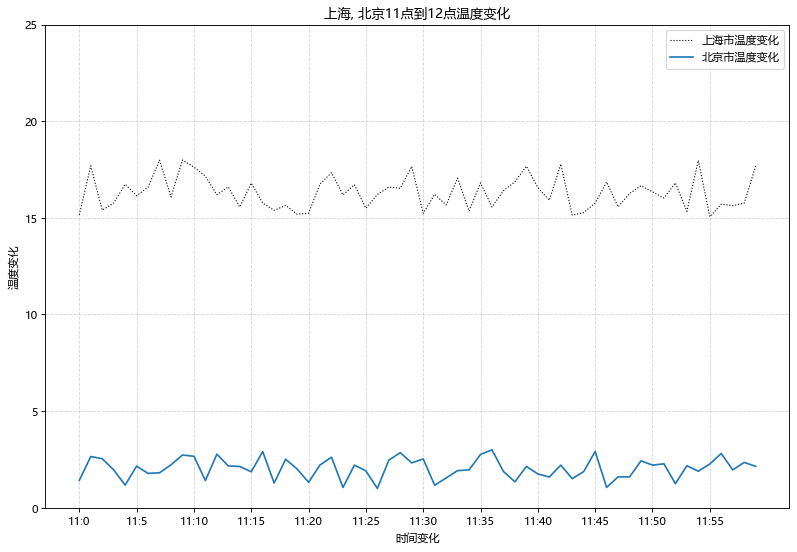

In [4]:
# 需求: 再增加一个城市温度变化
# 收集到北京当天文图变化情况, 温度再1度到3度之间

# 1. 准备数据
x = range(60)
y_shanghai = [random.uniform(15, 18) for i in x]
y_beijing = [random.uniform(1, 3) for i in x]

# 2. 创建画布
figure(figsize=(12, 8), dpi=80)

# 3. 绘制图像, 使用两个plot, 这样在一个绘图区添加两个曲线
plot(x, y_shanghai, label="上海市温度变化", color="k", linestyle=":", linewidth="1") 
# 可以更改颜色, 线宽, 线条风格
plot(x, y_beijing, label="北京市温度变化")

# 图像辅助层上添加信息
legend() # 显式的开启legend
# 设置坐标轴:
x_asix_label = [f"11:{i}" for i in x]
xticks(x[::5], x_asix_label[::5])
yticks(range(0, 30, 5))
grid(True, alpha=0.5, linestyle='--')
xlabel("时间变化")
ylabel("温度变化")
title("上海, 北京11点到12点温度变化")

show()


# 多个坐标系显示 -> plt.subplots -> 面向对象的画图方法


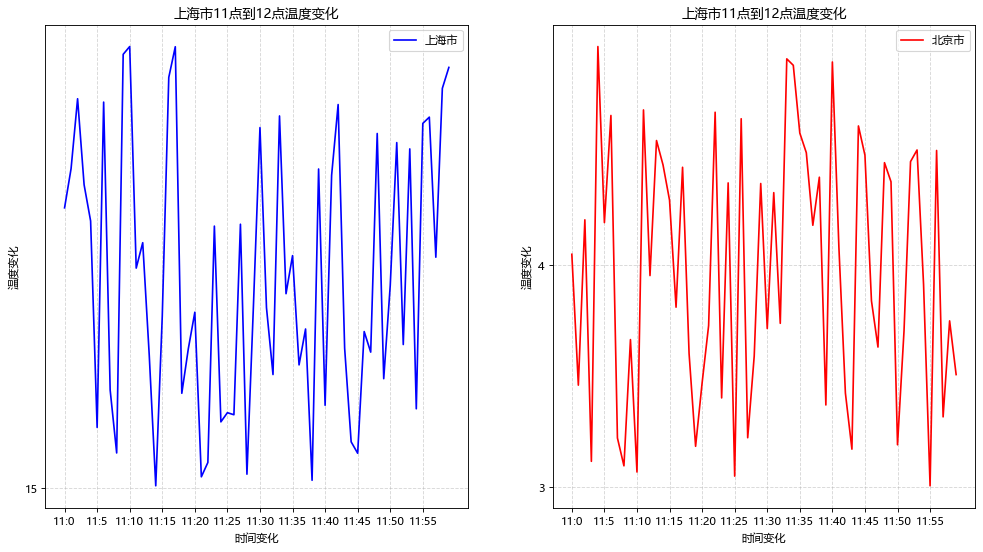

In [10]:
# 需求：再添加一个城市的温度变化
# 我们想过要上海和北京的天气图显示在同一张图当中.
# 收集到北京当天温度变化情况，温度在1度到3度。

# 1. 准备数据: x, y
x = range(60)
y_shanghai = [random.uniform(15, 18) for i in x]
y_beijing = [random.uniform(3, 5) for i in x]

# 2. 创建多绘图区画布
figure, axes = subplots(nrows=1, ncols=2, figsize=(15, 8), dpi=80)
# 此函数的两个整数参数指定子图网格的行数和列数。该函数返回一个图形对象和一个包含等于nrows * ncols的轴对象的元组。
# 每个轴对象都可通过索引访问。在这里，我们创建一个1行2列的子图，并在每个子图中显示2个不同的图。
# 返回的axes就是绘图区对象, 我们使用索引的方式选择绘图区

# 3. 绘制图像
axes[0].plot(x, y_shanghai, color="b", linestyle="-", label="上海市")
axes[1].plot(x, y_beijing, color="r", linestyle="-", label="北京市")

# 图像辅助层
# 显示开启图例
axes[0].legend()
axes[1].legend()

# 为两个绘图区分别添加刻度, 以及x,y轴描述, 以及刻度, 注意, 面对对象时候是set_*
x_axis_label = [f"11:{i}" for i in x] # 准备刻度说明
axes[0].set_xticks(x[::5], x_axis_label[::5])
axes[0].set_yticks(range(15, 20, 5))
axes[1].set_xticks(x[::5], x_axis_label[::5])
axes[1].set_yticks(range(3, 5, 1))
# axes[0].set_xticks(x[::5])
# axes[0].set_xticklabels(x_label[::5])

# 添加横纵坐标轴信息
axes[0].set_xlabel("时间变化")
axes[0].set_ylabel("温度变化")
axes[0].set_title("上海市11点到12点温度变化")
axes[1].set_xlabel("时间变化")
axes[1].set_ylabel("温度变化")
axes[1].set_title("上海市11点到12点温度变化")

# 添加网格显示:
axes[0].grid(linestyle='--', alpha=0.5)
axes[1].grid(linestyle='--', alpha=0.5)

show()

### 绘制数学函数图像


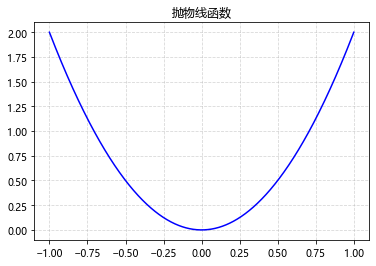

In [13]:
from matplotlib.pyplot import *
import numpy as np

# 1. 准备数据:
x = np.linspace(-1, 1, 1000)
y = 2 * x * x # 一个抛物线函数

# 创建画布:
figure(1)
title("抛物线函数")

# 画出图像
plot(x, y, linestyle='-', color='b')
grid(True, linestyle='--', alpha=0.5)

show()



### 各种图像的绘制:

### 散点图的绘制:
api:
    plt.scatter()


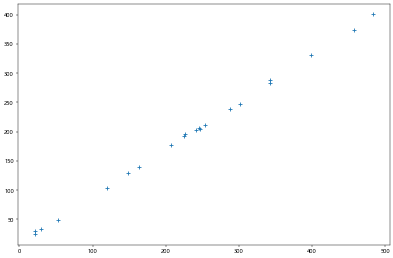

In [31]:
# 准备数据
x = [225.98, 247.07, 253.14, 457.85, 241.58, 301.01,  20.67, 288.64,
       163.56, 120.06, 207.83, 342.75, 147.9 ,  53.06, 224.72,  29.51,
        21.61, 483.21, 245.25, 399.25, 343.35]

y = [196.63, 203.88, 210.75, 372.74, 202.41, 247.61,  24.9 , 239.34,
       140.32, 104.15, 176.84, 288.23, 128.79,  49.64, 191.74,  33.1 ,
        30.74, 400.02, 205.35, 330.64, 283.45]

# 创建画布:
figure(figsize=(12, 8), dpi=40)

# 画图:
scatter(x, y, marker='+') # 绘制散点图, 并且更改标记

show()




### 需求1: 对比每部电影的票房收入

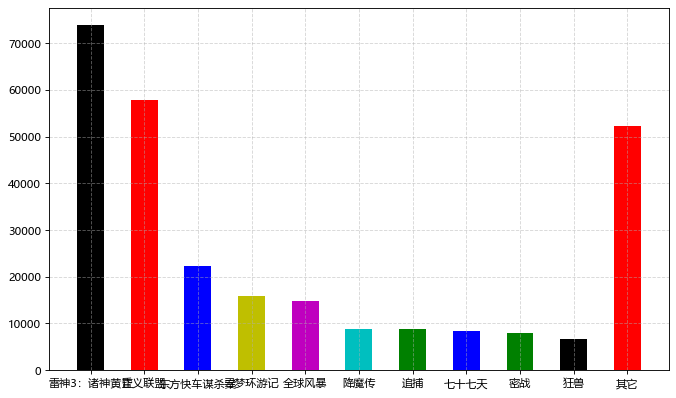

In [21]:
import matplotlib.pyplot as plt
# 1. 准备数据
# 分别是电影名字和票房
movie_names = ['雷神3：诸神黄昏','正义联盟','东方快车谋杀案','寻梦环游记','全球风暴', '降魔传','追捕','七十七天','密战','狂兽','其它']
tickets = [73853,57767,22354,15969,14839,8725,8716,8318,7916,6764,52222]

# 2. 创建画布
plt.figure(figsize=(10, 6), dpi=80)

# 3. 绘制图形:
x_ticks = range(len(movie_names))
plt.bar(
    x_ticks,
    tickets,
    width=0.5,
    color=['k', 'r', 'b', 'y', 'm', 'c', 'g', 'b' ,'g'],

)

# 图像辅助层
plt.xticks(x_ticks, movie_names)
plt.grid(alpha=0.5, linestyle='--')

plt.show()


### 需求2: 如何对比电影票房的收入才能更有说服力?
对比相同天数的票房, 也就是说同一天, 显示不同电影票房

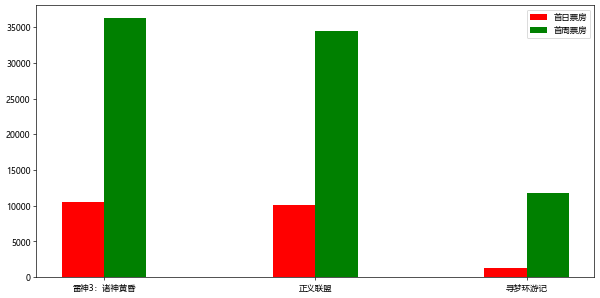

In [28]:
# 1. 准备数据
# 电影名称
movie_name = ['雷神3：诸神黄昏','正义联盟','寻梦环游记']
# 票房数据:
first_day = [10587.6,10062.5,1275.7]
first_weekend=[36224.9,34479.6,11830]

# 2. 创建画布
plt.figure(figsize=(12, 6), dpi=60)

# 3. 绘制柱状图
width = 0.2
plt.bar(range(len(movie_name)), first_day,width=width, color='r', label="首日票房")
# 但是我们想要在一个位置上绘制两个柱形图, 怎么办, 我们的方法是两次bar
plt.bar([x+width for x in range(len(movie_name))],  first_weekend, width=width, color='g', label="首周票房")
# 并且你需要指定width, 否则,就会遮挡住我们的柱状图

# 显示图例
plt.legend()

# 修改刻度与描述
plt.xticks([x+width/2 for x in range(len(movie_name))], movie_name)
# 在中间显示刻度和描述



plt.show()



### 直方图的绘制
    API: plt.hist()
    统计数据的, 所以只需要一个数据即可
def hist( <br>
        x, # 数据<br>
        bins=None, # 组数 <br>
        range=None, # 可选边界
        density=False, # 是否归一化, 无量纲化
         weights=None,
        cumulative=False, bottom=None, histtype='bar', align='mid',
        orientation='vertical', rwidth=None,# 宽度 log=False, color=None,
        label=None, stacked=False, *, data=None, **kwargs):

.hist方法的直方图画法，先查找数据集中的最小值和最大值，并在这些值之间创建bins个等间距的区间，然后统计每个区间中的数据数

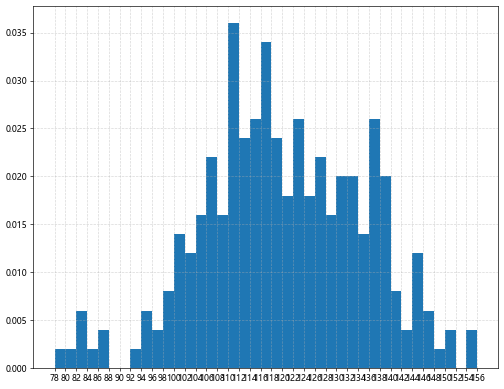

In [37]:
# 需求: 展现出电影时长分布状况
# 1. 准备数据:
time = [131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114, 119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125, 138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

# 2. 创建画布
plt.figure(figsize=(10, 8), dpi=60)
#
distance = 2 # 组距, 也就是每个组两端点的差值

# 计算组数
bins = int((max(time) - min(time)) / distance) # 计算一共有多少组
# 3. 画图
plt.hist(time, bins=bins, density=True, rwidth=1)

# 图像辅助层
plt.xticks(range(min(time), max(time) + distance, distance)) #

# 添加网格:
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### 绘制饼图

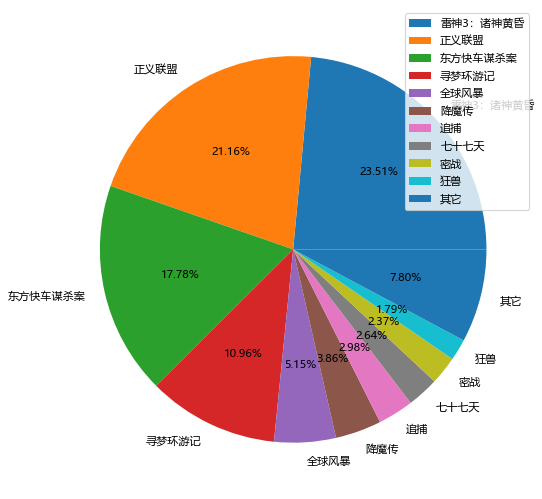

In [41]:
# 类别准备
# 1. 数据: 类别名和对应数据
movie_name = ['雷神3：诸神黄昏','正义联盟','东方快车谋杀案','寻梦环游记','全球风暴','降魔传','追捕','七十七天','密战','狂兽','其它']
place_count = [60605,54546,45819,28243,13270,9945,7679,6799,6101,4621,20105]

# 2. 创建画布
plt.figure(figsize=(12, 8), dpi=80)

# 3. 绘制饼图
plt.pie(place_count, labels=movie_name, autopct="%1.2f%%")

plt.legend() # 标签就是前面对应的labels


plt.show()



































